In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','sp','rgeos','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"Warning message:
"package 'raster' was built under R version 3.4.2"

In [2]:
# Read in a raster file
rasterFile <- raster('datasets/nemo_weather/nemowx3.tif')

In [3]:
# print raster info
rasterFile

class       : RasterLayer 
dimensions  : 35, 41, 1435  (nrow, ncol, ncell)
resolution  : 5000, 5000  (x, y)
extent      : 462749.5, 667749.5, 4332713, 4507713  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\nemo_weather\nemowx3.tif 
names       : nemowx3 


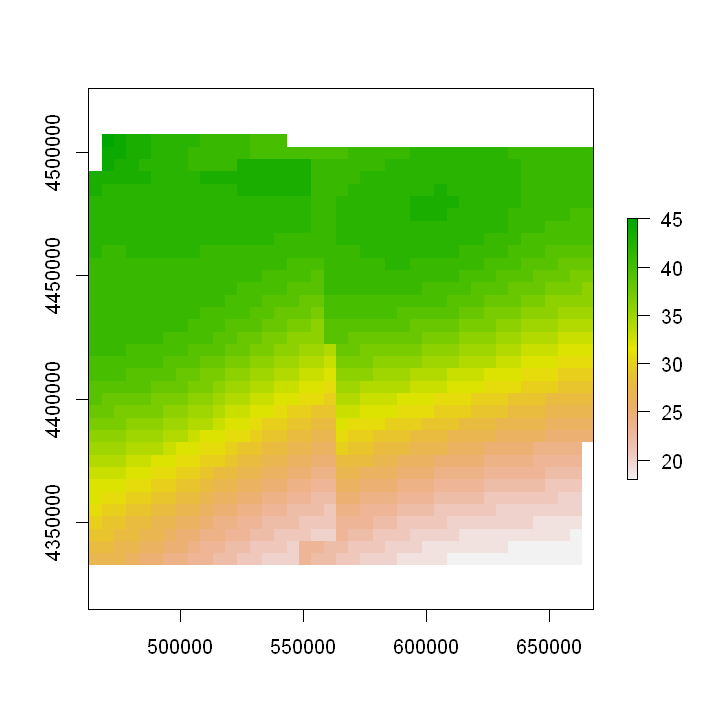

In [4]:
# Map raster data
plot(rasterFile)

### Random Sampling

In order to apply random sampling to a raster dataset, the function sampleRandom() (raster library) can be used. The inputs to the function include a raster layer and the number of samples. The output of this function is is configured to be a  spatialpoints dataframe by setting sp=TRUE. Refer to the documentation to see the other optional arguments that can be applied. Below, the sampled points are overlaid with the raster layer and the attributes of the sampled points are also printed to the screen.

In [5]:
# specify number of samples to take
n <- 50

# Conduct random sampling, also return sampled row, column and cell number and a spatial points data frame
samp.rand <- sampleRandom(rasterFile, n, 
                              rowcol = TRUE, 
                              cells = TRUE, sp = TRUE)

In [6]:
head(samp.rand)

cell,row,col,nemowx3
411,11,1,41
1176,29,28,24
1201,30,12,26
1414,35,20,22
730,18,33,35
747,19,9,39


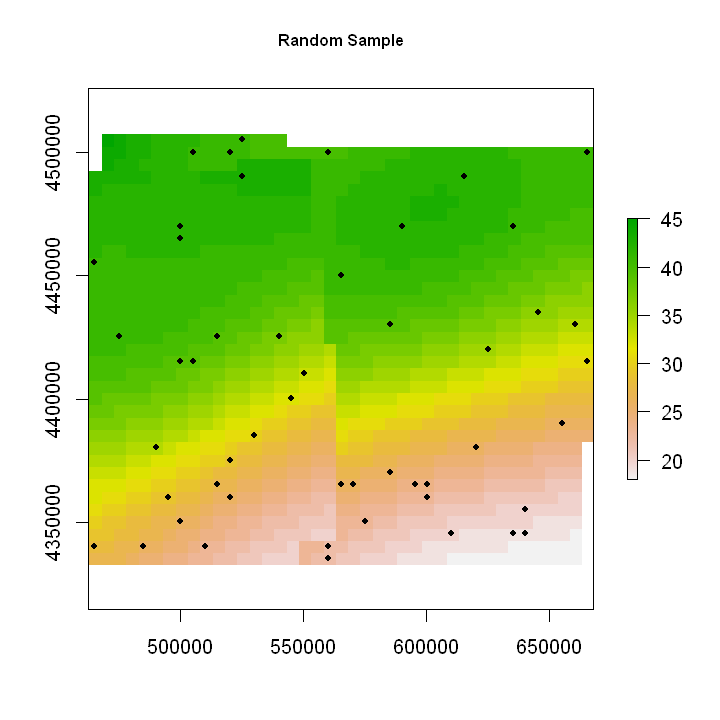

In [7]:
# Map raster file
plot(rasterFile, main = "Random Sample", cex.main = 0.8)

# add sampled points to the map
plot(samp.rand, pch = 20, add = TRUE)

In [8]:
# print sample information
head(samp.rand, 20)

cell,row,col,nemowx3
411,11,1,41
1176,29,28,24
1201,30,12,26
1414,35,20,22
730,18,33,35
747,19,9,39
1057,26,32,26
1196,30,7,29
746,19,8,39
1031,26,6,34


### Regular Sampling

For regular sampling, the sampleRegular() function (raster library) can be applied. Arguments for this function somewhat similar to that of randomSampling(), but there are additional options that you should note in the documentation of the function.

In [12]:
# specify number of samples to take
n <- 50

# Conduct regular sampling, also return sampled coordinates, 
# cell numbers and a spatial points data frame
samp.reg <- sampleRegular(rasterFile, n, 
                          cells = TRUE, 
                          sp = TRUE)

In [13]:
head(samp.reg)

cell,nemowx3
85,43
91,41
97,43
102,41
108,42
114,42


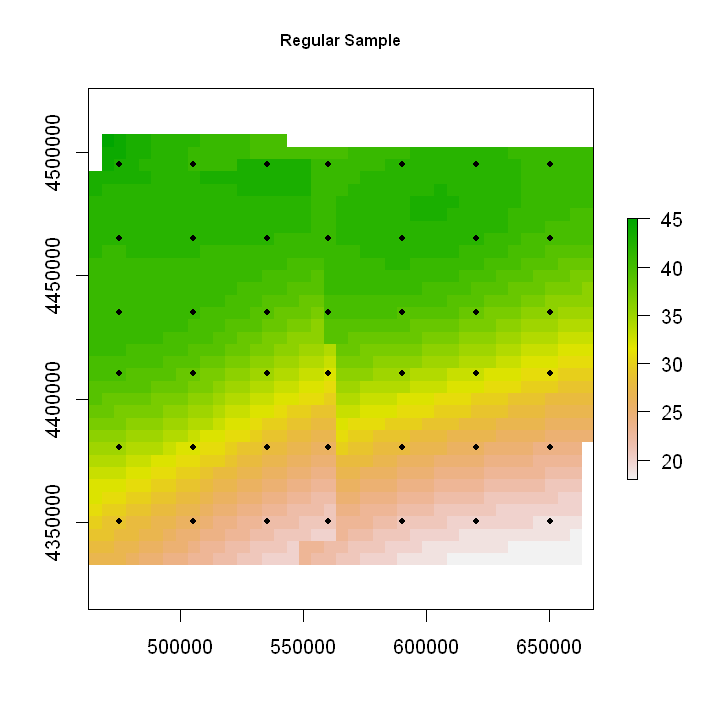

In [11]:
# Map raster data
plot(rasterFile, main = "Regular Sample", cex.main = 0.8)

# add sampled points to the map
plot(samp.reg, pch = 20, add = TRUE)

### Stratified Sampling

In stratified sampling, the samples are taken such that n cells for each unique raster value are selected. If n = 1, the sample size is equal to the number of unique values in the raster. For n > 1, if possible n*(number of uniques raster values) are taken. To examine how this works, let's apply the sampleStratified() function (raster library). After examining the results for n=1, experiment with n=2 and n=3.  How do changes in n affect the sample? What problems may arise?

In [14]:
# Take one sample for each raster unique value
n <- 1

# Also return sampled coordinates, cell numbers and 
# a spatial points data frame
samp.stra <- sampleStratified(rasterFile, n, xy = TRUE)

In [15]:
head(samp.stra)

cell,x,y,nemowx3
1388,635249.5,4340213,18
1343,615249.5,4345213,19
1301,610249.5,4350213,20
1330,550249.5,4345213,21
1184,640249.5,4365213,22
1104,650249.5,4375213,23


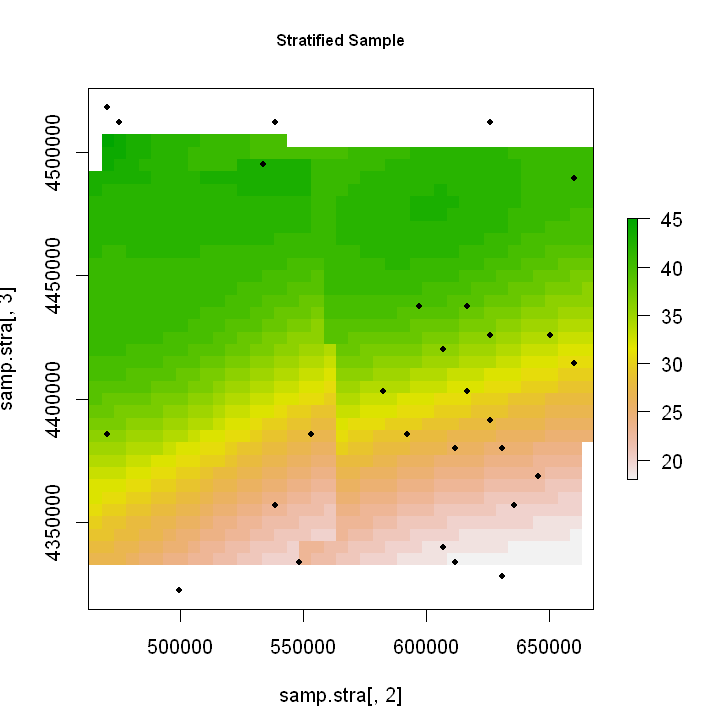

In [16]:
# Map raster data
plot (rasterFile, main = "Stratified Sample", cex.main = 0.8)

# Keep the privious frame for next plot
par(new = TRUE)


# Add sampled points to the map
plot(samp.stra[,2], samp.stra[,3], pch = 20, axes = FALSE)


In [17]:
# print sampled point infromation
head(samp.stra)

cell,x,y,nemowx3
1388,635249.5,4340213,18
1343,615249.5,4345213,19
1301,610249.5,4350213,20
1330,550249.5,4345213,21
1184,640249.5,4365213,22
1104,650249.5,4375213,23
